In [6]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv('/Users/Ynes/Downloads/cryptocurrencypricehistory (1)/Ripple_price.csv',index_col='Date',parse_dates=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,1.14,1.17,1.08,1.09,"806,673,000","44,648,100,000"
2018-02-19,1.12,1.17,1.12,1.14,"556,304,000","43,813,300,000"
2018-02-18,1.20,1.21,1.09,1.12,"1,113,650,000","46,997,500,000"
2018-02-17,1.14,1.22,1.13,1.20,"1,186,730,000","44,370,200,000"
2018-02-16,1.14,1.15,1.11,1.14,"568,339,000","44,663,300,000"


In [9]:
df.index

DatetimeIndex(['2018-02-20', '2018-02-19', '2018-02-18', '2018-02-17',
               '2018-02-16', '2018-02-15', '2018-02-14', '2018-02-13',
               '2018-02-12', '2018-02-11',
               ...
               '2013-08-13', '2013-08-12', '2013-08-11', '2013-08-10',
               '2013-08-09', '2013-08-08', '2013-08-07', '2013-08-06',
               '2013-08-05', '2013-08-04'],
              dtype='datetime64[ns]', name='Date', length=1662, freq=None)

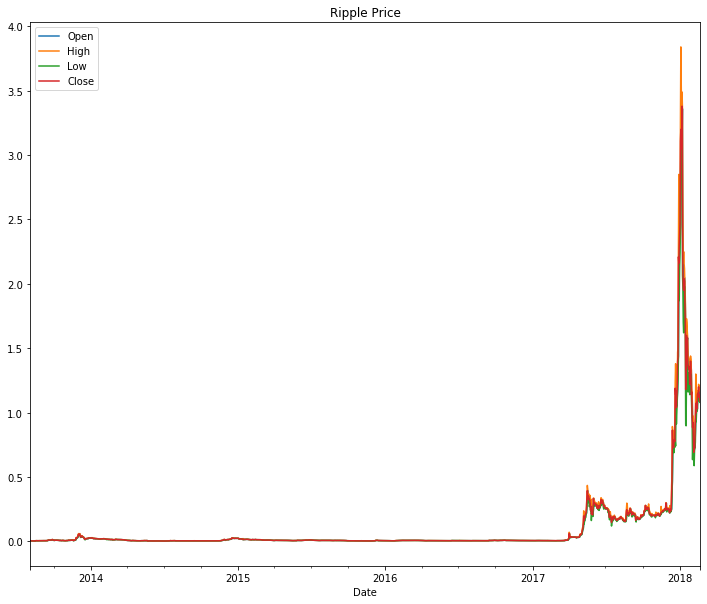

In [10]:
df.plot(figsize=(12,10),title='Ripple Price')

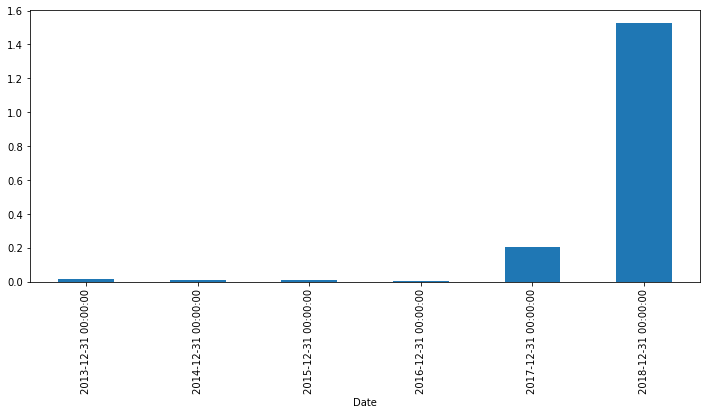

In [11]:
df['Close'].resample('Y').mean().plot.bar(figsize=(12,5))

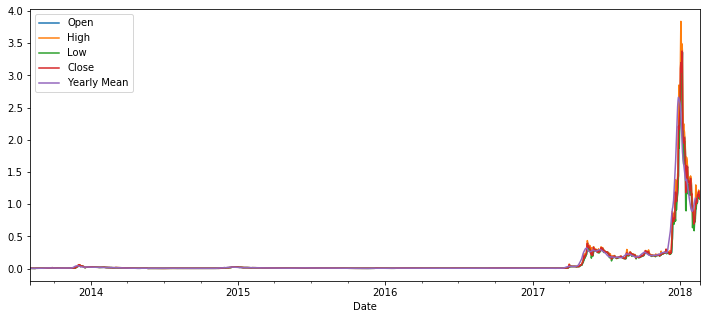

In [12]:
df['Yearly Mean']=df['Close'].rolling(window=12).mean()
df.plot(figsize=(12,5))

In [13]:
df_list = df['Close'].to_list()

In [14]:
lnclose

Date
2018-02-20    0.086178
2018-02-19    0.131028
2018-02-18    0.113329
2018-02-17    0.182322
2018-02-16    0.131028
                ...   
2013-08-08   -5.459896
2013-08-07   -5.422295
2013-08-06   -5.364457
2013-08-05   -5.182670
2013-08-04   -5.135858
Name: Close, Length: 1662, dtype: float64

In [15]:
ln_list = lnclose.to_list()

In [16]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.01, False)

In [17]:
df_list = df_list

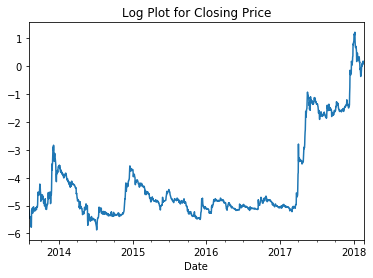

In [18]:
lnclose=np.log(df['Close'])
lnclose
lnclose.plot(title='Log Plot for Closing Price')
#adjusting for volatility

In [19]:
from statsmodels.tsa.stattools import acf,pacf
import pandas as pd

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


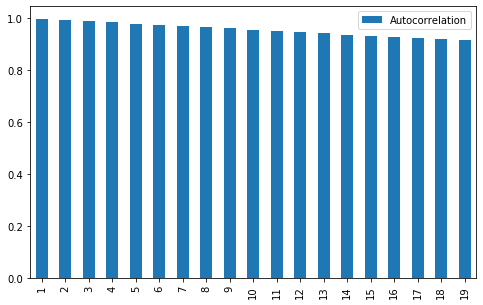

In [20]:
acf_1 = acf(lnclose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Gentle decrease downwards for each lag

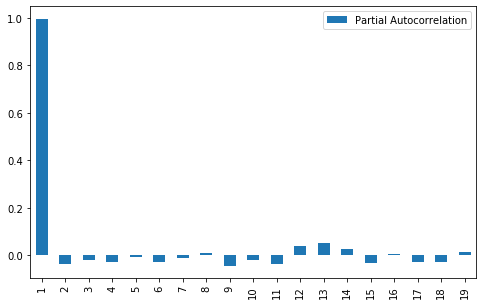

In [21]:
pacf_1 = pacf(lnclose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Sudden decrease downwards between first and subsequent lags suggesting we have a stationary AR1 time series

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ripple Integrated by order of 1')

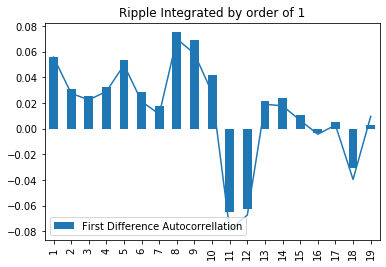

In [23]:
lnclose_diff=lnclose-lnclose.shift()
diff=lnclose_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrellation']
test_df.index +=1
test_df.plot.bar()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.title('Ripple Integrated by order of 1')
#Integrated order of 1

In [24]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(lnclose)

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.41789150956718946, True)

In [25]:
from statsmodels.tsa.ar_model import AR,ARResults

In [26]:
x = lnclose.values
x.size

1662

In [27]:
import matplotlib.pyplot as plt

In [28]:
df.dropna(inplace=True)

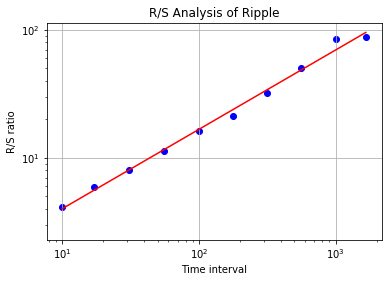

H=0.6206, c=0.9583


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

series = ln_list

H, c, data = compute_Hc(series, simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="red")
ax.scatter(data[0], data[1], color="blue")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.title('R/S Analysis of Ripple')
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

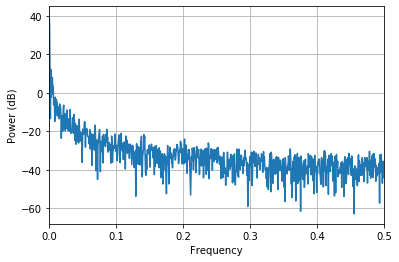

In [26]:
from spectrum import *
p = Periodogram(ln_list)
p()
p.plot()

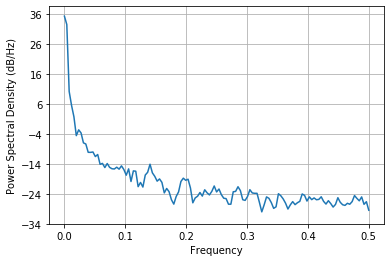

In [27]:
from spectrum import *
psd = WelchPeriodogram(ln_list, 256)

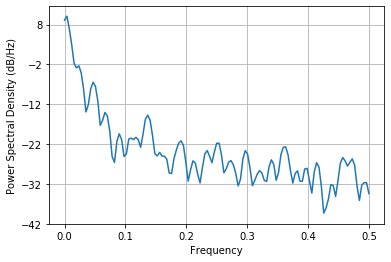

In [28]:
from spectrum import *
psd = WelchPeriodogram(df_list, 256)

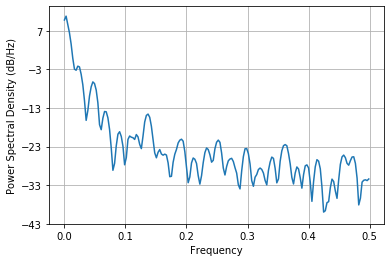

In [29]:
from spectrum import *
psd = WelchPeriodogram(df_list, 365)

In [30]:
import nolds

In [31]:
h = 1/nolds.dfa(df_list)

In [32]:
h

0.6451678990873579

In [33]:
t = nolds.hurst_rs(df_list)

In [34]:
t

0.9168735336456255

In [35]:
print ('        #### Hurst Calculation Results for Ripple #####    ')
print ('============================================================')
print ('  DFA Hurst Parameter Calculation : ',h)
print ('  R/S Analysis Hurst  Calculation : ',H)

        #### Hurst Calculation Results for Ripple #####    
  DFA Hurst Parameter Calculation :  0.6451678990873579
  R/S Analysis Hurst  Calculation :  0.6206380653976946


In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df_list, **kw):
        statistic, p_value, n_lags, critical_values = kpss(df_list, **kw)
        print ('Statistic:',{statistic})
        print ('p_value:',{p_value})
        print ('Number of lags:',{n_lags})

In [37]:
kpss_test(df_list)

Statistic: {0.0005975569580181831}
p_value: {0.1}
Number of lags: {137}


/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
